In [1]:
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlopen

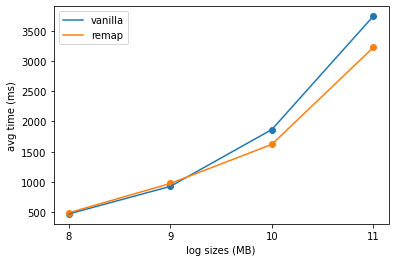

In [2]:
sizes = [256, 512, 1024, 2048]
remap_4kb_times = [491.489,  975.875, 1621.118, 3222.470]
vanilla_4kb_times = [472.193, 927.376, 1866.473, 3738.713 ]
plt.plot(np.log2(sizes), vanilla_4kb_times, label="vanilla")
plt.scatter(np.log2(sizes), vanilla_4kb_times)
plt.plot(np.log2(sizes), remap_4kb_times, label="remap")
plt.scatter(np.log2(sizes), remap_4kb_times)
plt.legend()
plt.xticks(np.log2(sizes))
plt.xlabel("log sizes (MB)")
plt.ylabel("avg time (ms)")
plt.savefig("fig/libfs_time_4KB_IO.png")

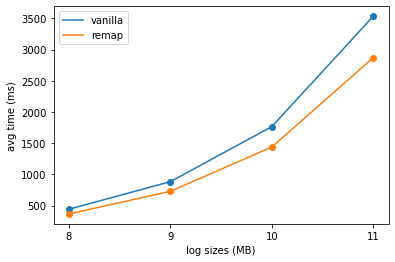

In [3]:
sizes = [256, 512, 1024, 2048]
remap_1mb_times = [365.926,  727.894, 1438.579, 2870.402]
vanilla_1mb_times = [441.104, 882.956, 1765.430, 3534.333 ]
plt.plot(np.log2(sizes), vanilla_1mb_times, label="vanilla")
plt.scatter(np.log2(sizes), vanilla_1mb_times)
plt.plot(np.log2(sizes), remap_1mb_times, label="remap")
plt.scatter(np.log2(sizes), remap_1mb_times)
plt.legend()
plt.xticks(np.log2(sizes))
plt.xlabel("log sizes (MB)")
plt.ylabel("avg time (ms)")
plt.savefig("fig/libfs_time_1MB_IO.png")

In [4]:
def performance_gain(vanilla, remap):
    return (vanilla-remap) / vanilla * 100

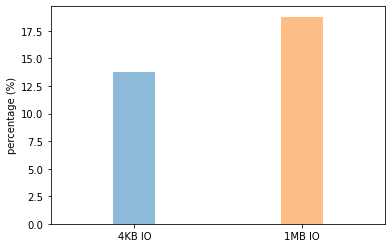

In [5]:
plt.bar(0, performance_gain(vanilla_4kb_times[-1], remap_4kb_times[-1]), width = 0.25, alpha=0.5)
plt.bar(1, performance_gain(vanilla_1mb_times[-1], remap_1mb_times[-1]), width = 0.25, alpha=0.5)
plt.xlim([-0.5, 1.5])
plt.xticks([0, 1], labels=["4KB IO", "1MB IO"])
plt.ylabel("percentage (%)")
plt.savefig("fig/libfs_2GB_write_performance_gain.png")

In [6]:
def parse_log(url, target_token="digest", level=0):
    times = []
    file = urlopen(url)
    for line in file:
        line = line.decode("utf-8")
        tokens = line.split()
        if len(tokens) < 3:
            continue
        if tokens[level] == target_token:
            times.append(float(tokens[2]))
    return times

vanilla_url = "https://raw.githubusercontent.com/TieJean/assise/vanilla/kernfs/tests/iotest2GB.log"
remap_url = "https://raw.githubusercontent.com/TieJean/assise/remap/kernfs/tests/iotest2GB.log"

vanilla:  4.865214285714286 0.36879509409504274
remap:    2.978663551401869 0.23239677414739757


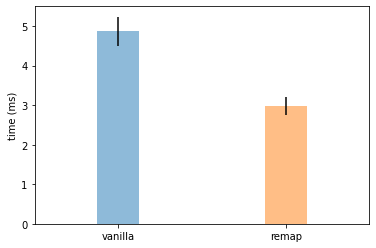

In [7]:
vanilla_digest_times = parse_log(vanilla_url)
remap_digest_times = parse_log(remap_url)
plt.bar(0, np.mean(vanilla_digest_times), yerr=np.std(vanilla_digest_times), width = 0.25, alpha=0.5)
plt.bar(1, np.mean(remap_digest_times), yerr=np.std(remap_digest_times), width = 0.25, alpha=0.5)
plt.xlim([-0.5, 1.5])
plt.xticks([0, 1], labels=["vanilla", "remap"])
plt.ylabel("time (ms)")
plt.savefig("fig/kernfs_digest_time.png") # nr_digest = 4916
print("vanilla: ", str(np.mean(vanilla_digest_times)), str(np.std(vanilla_digest_times)))
print("remap:   ", str(np.mean(remap_digest_times)), str(np.std(remap_digest_times)))

In [8]:
# vanilla_digest_file_times = parse_log(vanilla_url, target_token="file", level=1)
# remap_digest_file_times = parse_log(remap_url, )
# plt.bar(0, np.mean(vanilla_digest_times), yerr=np.std(vanilla_digest_times), width = 0.25, alpha=0.5)
# plt.bar(1, np.mean(remap_digest_times), yerr=np.std(remap_digest_times), width = 0.25, alpha=0.5)
# plt.xlim([-0.5, 1.5])
# plt.xticks([0, 1], labels=["vanilla", "remap"])
# plt.ylabel("time (ms)")
# plt.savefig("fig/kernfs_digest_file_time.png") # nr_digest = 4916
# print("vanilla: ", str(np.mean(vanilla_digest_times)), str(np.std(vanilla_digest_times)))
# print("remap:   ", str(np.mean(remap_digest_times)), str(np.std(remap_digest_times)))